월별로 상대팀 생각x

2016.07.16.
2017.07.15.
2018.07.14
2019.07.21
기준 이전 날짜는 전반기 이후 날짜는 후반기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 가져오기

In [3]:
t_bat17=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2017.csv",encoding='utf-8',engine='python')
t_bat18=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2018.csv",encoding='utf-8',engine='python')
t_bat19=pd.read_csv("C:/Users/a/Desktop/2020빅콘/제공데이터/제공데이터(.CSV)_시즌별, 시트별 구분/2020빅콘테스트_스포츠투아이_제공데이터_팀타자_2019.csv",encoding='utf-8',engine='python')

In [4]:
#모든 열 다 출력하기
pd.options.display.max_columns=None

## 2. 월 정보 추가

In [5]:
#월 정보 추가
t_bat17['MONTH']=t_bat17['GDAY_DS'].astype(str).str[4:6]
t_bat18['MONTH']=t_bat18['GDAY_DS'].astype(str).str[4:6]
t_bat19['MONTH']=t_bat19['GDAY_DS'].astype(str).str[4:6]

In [6]:
stats=['PA','AB','RBI','RUN','HIT','H1','H2','H3','HR','SB','CS','SH','SF','BB','IB','HP'
       ,'KK','GD','ERR','LOB','P_AB_CN','P_HIT_CN']

## 3. 각 팀의 월별 타율 변수로 생성

In [7]:
#팀별 기록(17년도)
data17=t_bat17.filter(['T_ID','MONTH','AB','HIT'])
t17=data17.groupby(['T_ID','MONTH']).sum()
t17['HIT_RATE']=t17['HIT']/t17['AB']

#팀별 기록(19년도)
data18=t_bat18.filter(['T_ID','MONTH','AB','HIT'])
t18=data18.groupby(['T_ID','MONTH']).sum()
t18['HIT_RATE']=t18['HIT']/t18['AB']

#팀별 기록(19년도)
data19=t_bat19.filter(['T_ID','MONTH','AB','HIT'])
t19=data19.groupby(['T_ID','MONTH']).sum()
t19['HIT_RATE']=t19['HIT']/t19['AB']

In [8]:
#타율만 남김
t17=t17.drop(t17.columns[[0,1]],axis='columns')
t18=t18.drop(t18.columns[[0,1]],axis='columns')
t19=t19.drop(t19.columns[[0,1]],axis='columns')

In [9]:
t17=t17.reset_index(level=['T_ID','MONTH']) #MONTH열을 index에서 값으로 변환
t18=t18.reset_index(level=['T_ID','MONTH']) #MONTH열을 index에서 값으로 변환
t19=t19.reset_index(level=['T_ID','MONTH']) #MONTH열을 index에서 값으로 변환

In [10]:
#3월 경기 제거
t17=t17[t17['MONTH']!='03']
t18=t18[t18['MONTH']!='03']
t19=t19[t19['MONTH']!='03']

#10월 경기 일단 제거..
t17_9=t17[t17['MONTH']!='10']
t18_9=t18[t18['MONTH']!='10']
t19_9=t19[t19['MONTH']!='10']

In [11]:
data17=t17_9.pivot(index='T_ID',columns='MONTH',values='HIT_RATE')
data18=t18_9.pivot(index='T_ID',columns='MONTH',values='HIT_RATE')
data19=t19_9.pivot(index='T_ID',columns='MONTH',values='HIT_RATE')

In [12]:
data19

MONTH,04,05,06,07,08,09
T_ID,,,,,,
HH,0.251788,0.241455,0.247853,0.253435,0.261084,0.268802
HT,0.267009,0.268852,0.269596,0.263757,0.267349,0.253373
KT,0.246002,0.282511,0.289655,0.298555,0.273769,0.271973
LG,0.276903,0.255708,0.270148,0.260504,0.297136,0.258156
LT,0.268421,0.273859,0.243961,0.227656,0.251483,0.219200
NC,0.298223,0.295896,0.253149,0.286787,0.264925,0.269231
OB,0.284302,0.271702,0.271084,0.261092,0.301549,0.276119
SK,0.244694,0.269147,0.299097,0.275116,0.254524,0.236301
SS,0.261997,0.270239,0.275610,0.256610,0.225490,0.235217


## 4. 모델학습

In [13]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [14]:
# 모델 모듈
import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
X_cols=['0' + str(i) for i in range(4,9)]
Y_col=['09'] 

In [35]:
#### 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=100, learning_rate=0.05 ,max_depth=3, random_state=23),
    'lgbm':LGBMRegressor(),
    'rf':RandomForestRegressor(),
    'svr':SVR(),
    'reg':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso()}

In [17]:
train=data17
test=data19

In [36]:
X_train = train[X_cols]
Y_train = train[Y_col]

X_test = test[X_cols]
Y_test = test[Y_col]

model = model_dict['xgb']    #모델명 바꾸어 가면서 실험 가능
weight = train['08']
#model.fit(X_train, Y_train, sample_weight=weight)
model.fit(X_train, Y_train)  #가중치 제거

Y_predict = model.predict(X_test)

#test_error=mean_squared_error(Y_test, Y_predict, sample_weight=X_test['08']) ** 0.5
test_error=mean_squared_error(Y_test, Y_predict) ** 0.5  #가중치 제거

r2=r2_score(Y_test, Y_predict)
 
    
print("test error : ", test_error)
print("r2 : ", r2)
print("완료")

test error :  0.04457301557156734
r2 :  -5.259688628735302
완료


1.xgb > 
test error :  0.024632430441749672
r2 :  -0.6645697037194196

2. lgbm > 
test error :  0.02185244340343367
r2 :  -0.317440397821546

3. rf > 
test error :  0.021567645215552707
r2 :  -0.2655626315034607

4. svr > 
test error :  0.022712686166363988
r2 :  -0.4027787092042414

5. reg > 
test error :  0.04181604057242239
r2 :  -4.0212149498847864

6. ridge > 
test error :  0.03917854765963012
r2 :  -3.392563926438606

7. lasso > 
test error :  0.023887529650144353
r2 :  -0.5541297385972017


### 예측값과 실제값 차이

Text(0,0.5,'예측 값')

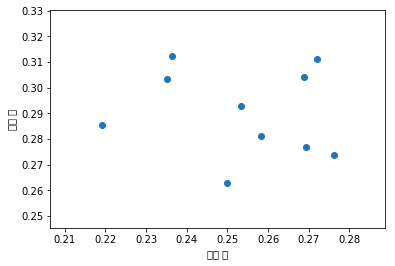

In [19]:
# 예측값과 실제값의 시각화
plt.scatter(Y_test, Y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")

In [20]:
#예측값과 실제값 차이
a=Y_test
a=a.assign(predict=Y_predict)
a['diff']=abs(a['09']-a['predict'])
a

MONTH,09,predict,diff
T_ID,,,
HH,0.268802,0.303989,0.035186
HT,0.253373,0.292941,0.039568
KT,0.271973,0.311368,0.039395
LG,0.258156,0.281196,0.023040
LT,0.219200,0.285479,0.066279
NC,0.269231,0.276879,0.007648
OB,0.276119,0.273876,0.002243
SK,0.236301,0.312508,0.076207
SS,0.235217,0.303537,0.068320


In [21]:
rss=sum(a['diff']**2)
tss=sum((a['09']-a['09'].mean())**2)
rsq=1-rss/tss
rsq

-5.296938278492618

In [22]:
#차이 합
a['diff'].sum()

0.37083525394221145

In [23]:
rss

0.01998576330775739